In [ ]:
import logging

logging.basicConfig(filename="25MarInfo.log", level=logging.INFO, format="%(asctime)s %(name)s %(message)s")

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# answer 1

In [ ]:
df=pd.read_excel('flight_price.xlsx')
df.shape

(10683, 11)

The dataset  has 10683 rows and 11 columns

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df.isna().sum()
df.dropna(inplace=True)

# answer 2

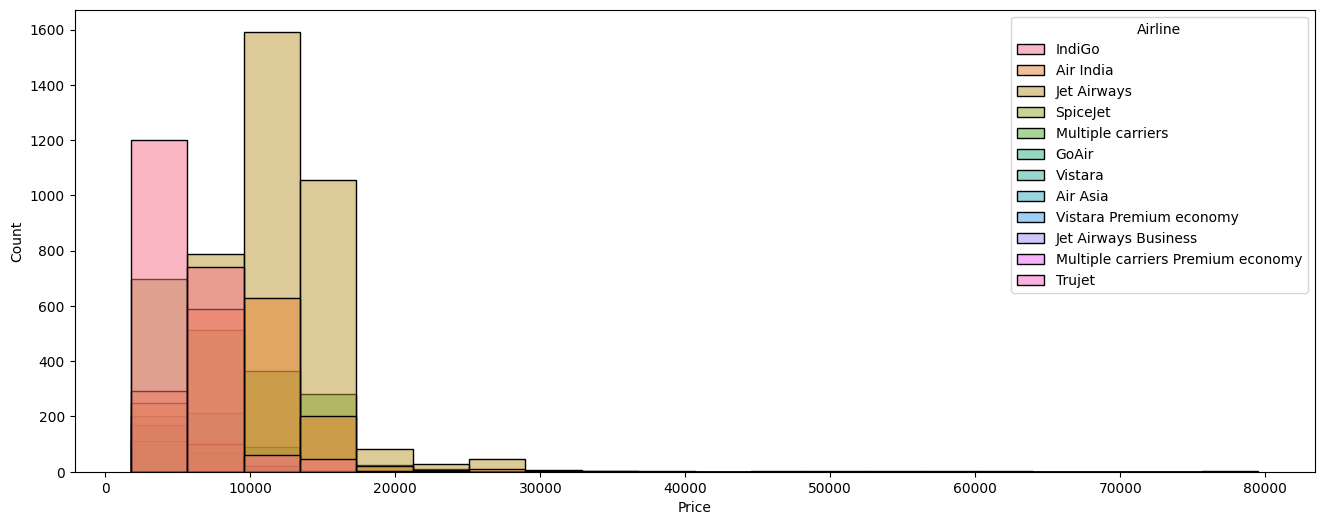

In [ ]:
plt.subplots(1,1,figsize=(16,6))
sns.histplot(x=df['Price'],hue=df['Airline'],bins=20)
plt.show()

# answer 3
The min price is 1759 and maximum is 79512

In [ ]:
df['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

# answer 4


<Axes: xlabel='Airline', ylabel='Price'>

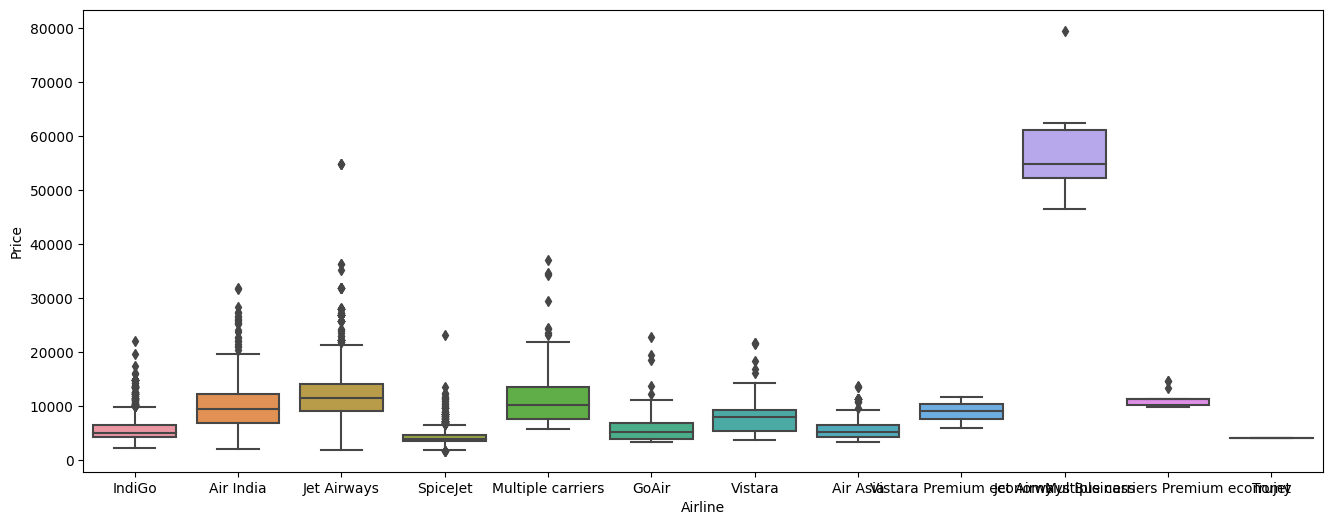

In [ ]:
plt.subplots(1,1,figsize=(16,6))
sns.boxplot(x=df['Airline'],y=df['Price'])

Observations:
- Jet Airways Business had the maximum flight price at 79.512K
- Jet Airways, Air India, Spicejet and Indigo have a very large number of outliers in comparison to other flights
- Jet Airways Business has comparatively very high flight prices

# answer 5

<Axes: xlabel='Airline', ylabel='Price'>

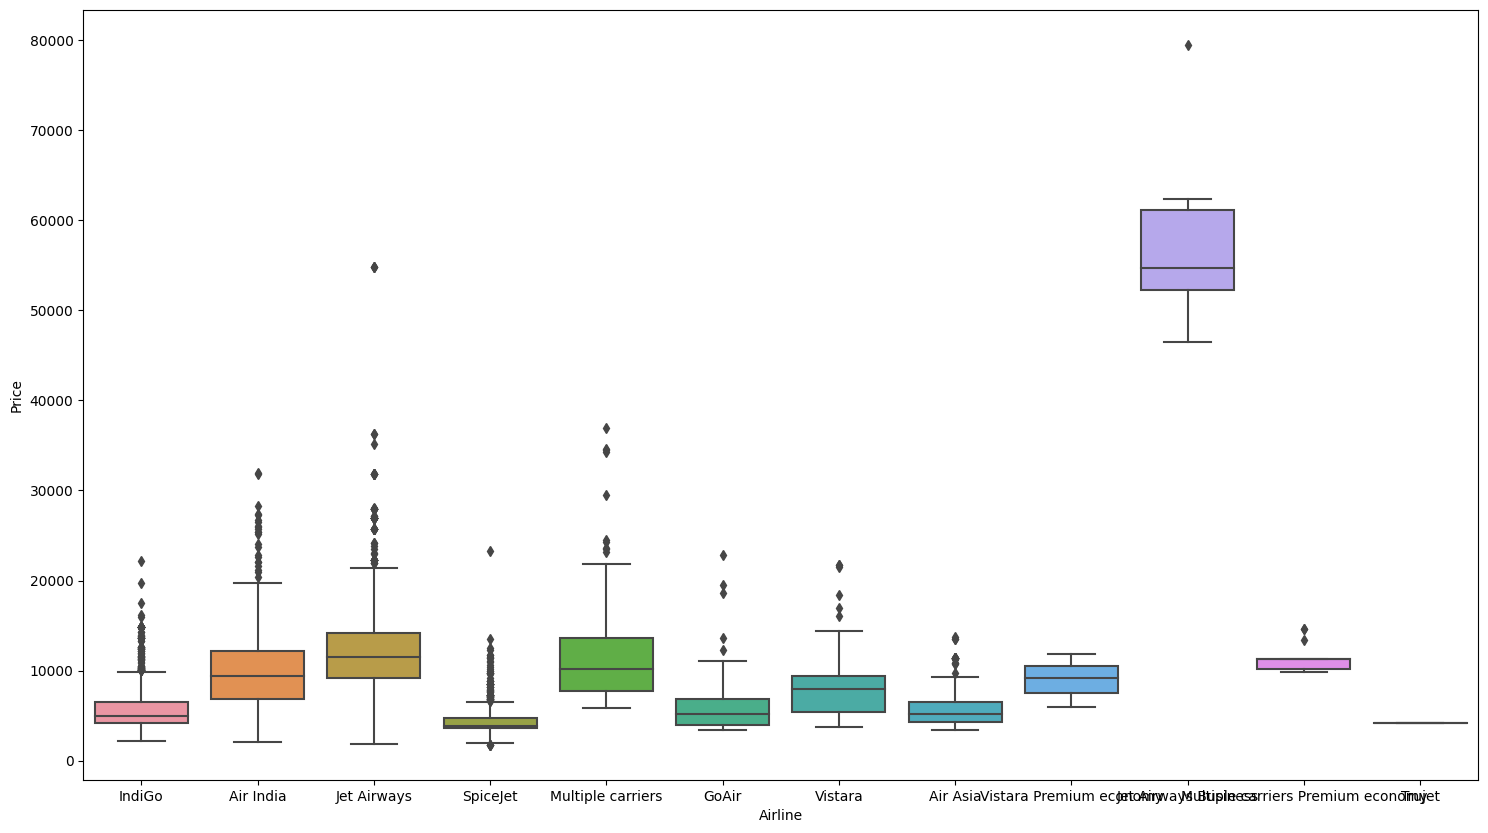

In [ ]:
plt.subplots(1,1,figsize=(18,10))
sns.boxplot(df,x='Airline',y='Price')

1. Jet Airways, Air India, Spicejet and Indigo have a very large number of outliers in comparison to other flights
2. If the outliers are non-randomly distributed, they can decrease normality
3. They can also bias or influence estimates that may be of substantive interest
4. Outliers can impact the basic assumption of Regression, ANOVA, and other statistical model assumptions
5. They can increase the error variance and reduce the power of statistical tests

# answer 6
To analyse the travel season, find the months with most travel flights.
So we split Dates to find month and then analyse to find the travel season:- 

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df['month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)

df['day']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


In [ ]:
df['month'].unique()

array([3, 5, 6, 4])

There are four seasons/months
month vs price distribution?

<Axes: xlabel='month', ylabel='Price'>

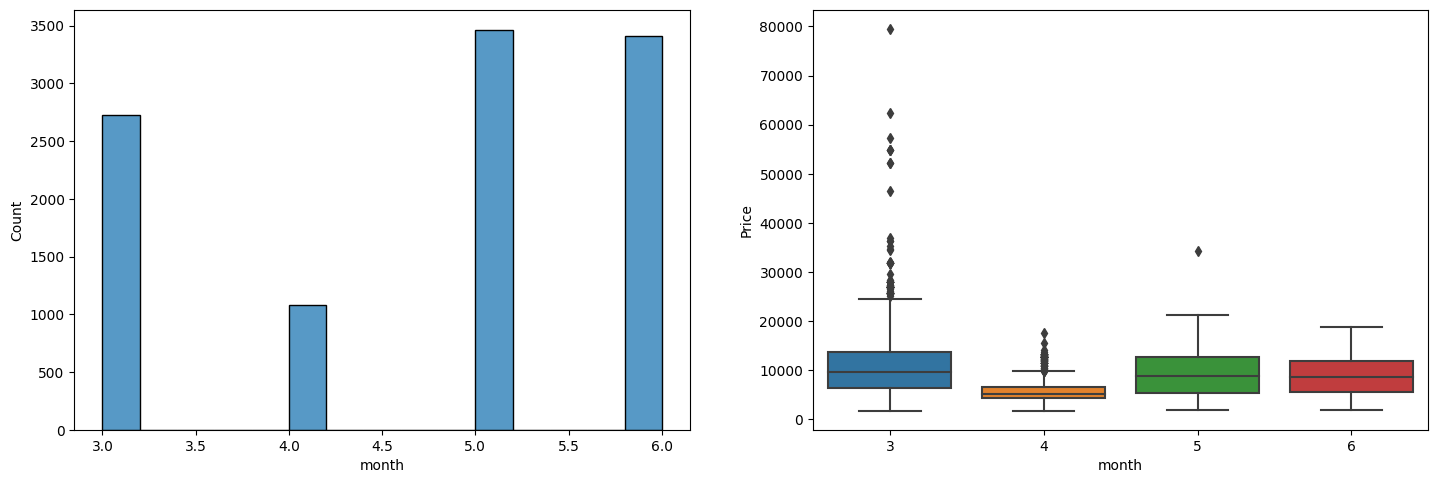

In [ ]:
plt.subplots(1,2,figsize=(27,12))

plt.subplot(231)
sns.histplot(x=df['month'])

plt.subplot(232)
sns.boxplot(x=df['month'],y=df['Price'])

In [ ]:
# plt.subplots(1,1,figsize=(20,8))
px.scatter(df,x='Airline',y='Price', color='month')

Observations:
- Month 5 has the highest number of price data points 
- Month 3 has the highest number of maximum flight prices
- Month 3 has the highest number of outliers
- The mean flight price for the month 3 is also high compared to the other months
# all these make month 3 and 5 best travel month
month 3 depicts that people paid a higher sum for 

# answer 7

In [ ]:
df.head(1)
# list(df.nunique())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019


In [ ]:
df['src-des']=df['Source']+"-"+df['Destination']
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,year,src-des
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019,Banglore-New Delhi


In [ ]:
# listing features which have less(say 15 categories)
for col in df.columns:
  if df[col].nunique() <= 15:
     print(col,":",df[col].unique())

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total_Stops : ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
Additional_Info : ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
month : [3 5 6 4]
day : [24  1  9 12 27 18  3 15  6 21]
year : [2019]
src-des : ['Banglore-New Delhi' 'Kolkata-Banglore' 'Delhi-Cochin' 'Chennai-Kolkata'
 'Banglore-Delhi' 'Mumbai-Hyderabad']


# visual analysis:


---


- Line plot or scatter plot: 

                          flight prices against
                                   vs 
                          Date_of_Journey, :-

---


                                month,
                                day
                                year
(identify any seasonal or yearly trends in flight prices.)
Note:-(here, data year is only 2019 so we neglect the year column/feature)


---


- Box plot: 
                            flight prices 
                                  vs
                            airline,
                            source,
                            destination 
                            src-dest
(identify any differences in prices among different airlines, sources, or destinations.)


---


# statistical analysis
for statistical analysis we have to apply Encoding to transfrom categorical data to numerical data
1. 'Airline', nominal 
2. 'Source', ordinal
3. 'Destination',  ordinal
4. 'Total_Stops',  ordinal/nominal
5. 'src-des' ordinal/nominal

- for nominal we can use OHE or binary encoding, for ordinal , we can use label encoding or target guided ordinal encoding
---
- Heatmap: 

    correlation between different features and flight prices.

---
- Regression analysis:

model the relationship between flight prices and other features such as duration, total stops, and additional information. 
(identify which features have a significant impact on flight prices.)
---
- Cluster analysis:
---
group flights based on their features and prices.
(identify any patterns or trends in flight prices among different groups of flights.)


<Axes: xlabel='Destination', ylabel='Price'>

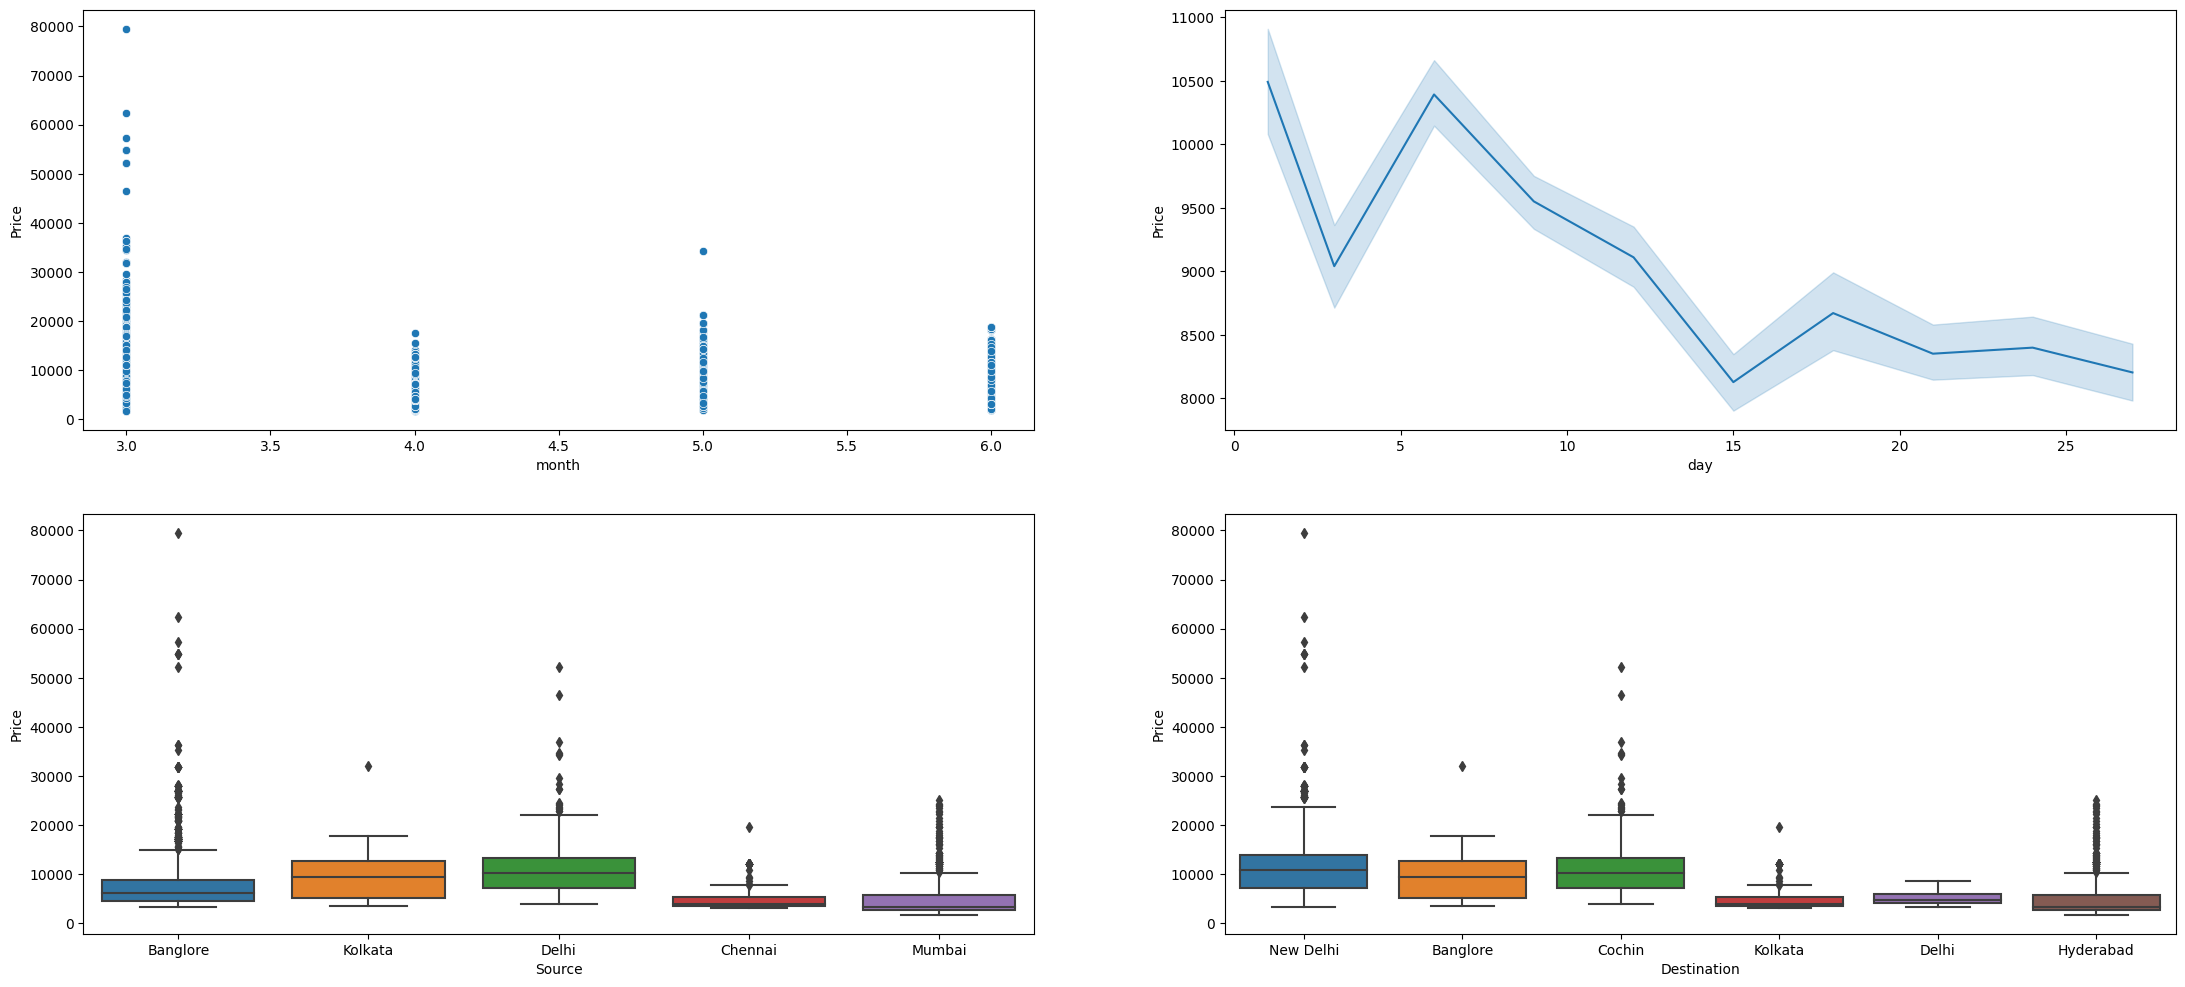

In [ ]:
plt.subplots(2,2,figsize=(27,12))

plt.subplot(221)
sns.scatterplot(x=df['month'],y=df['Price'])

plt.subplot(222)
sns.lineplot(x=df['day'],y=df['Price'])

plt.subplot(223)
sns.boxplot(df,x='Source',y='Price')

plt.subplot(224)
sns.boxplot(df,x='Destination',y='Price')

<Axes: xlabel='month', ylabel='Count'>

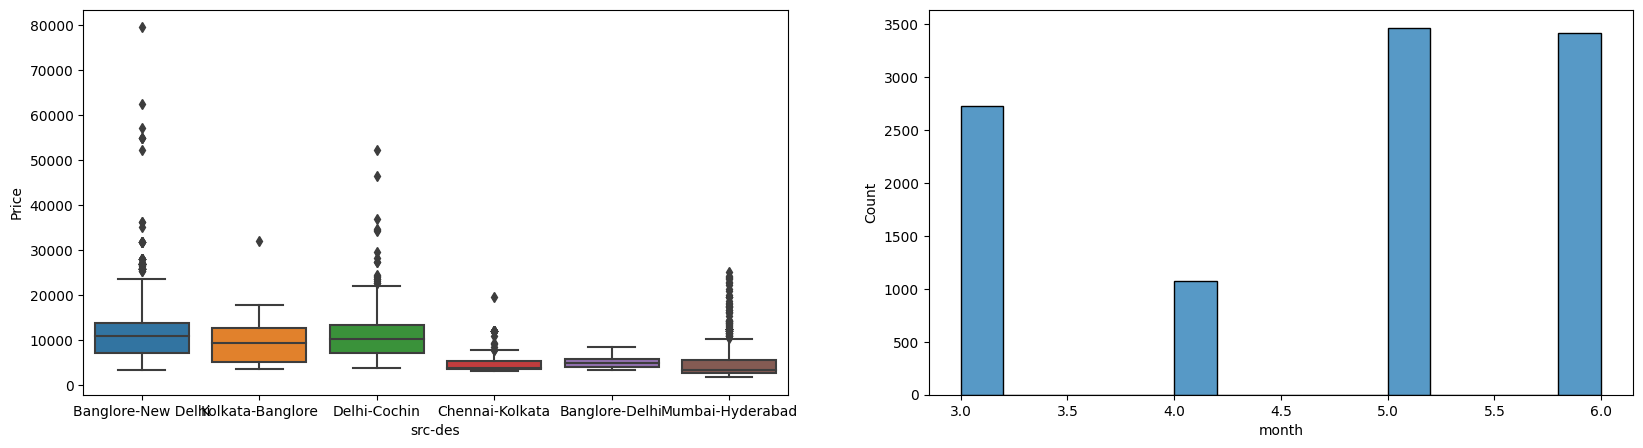

In [ ]:
plt.subplots(1,2,figsize=(20,5))

plt.subplot(121)
sns.boxplot(df,x='src-des',y='Price')

plt.subplot(122)
sns.histplot(df,x='month')

In [ ]:
from sklearn import preprocessing 

ohe=preprocessing.OneHotEncoder()
le=preprocessing.LabelEncoder()

In [ ]:
# 'Airline', nominal -- ohe
# 'Source', ordinal  -- label
# 'Destination', ordinal  --label
# 'Total_Stops', ordinal/nominal  --ohe
# 'src-des' ordinal/nominal  --label

# make a new df with features which are supposed to be most affect the flight price based on above visualisations
df_new=df[['Airline','Source','Destination','Total_Stops','src-des','month','Price']].copy()

In [ ]:
# apply encoding ohe
encoded=ohe.fit_transform(df_new[['Airline','Total_Stops']])
encoded_df=pd.DataFrame(encoded.toarray(),columns=ohe.get_feature_names_out())
df_new=pd.concat([df_new,encoded_df],axis=1)

In [ ]:
# apply encoding lable
df_new['Source']=le.fit_transform(df_new[['Source']])
df_new['Destination']=le.fit_transform(df_new[['Destination']])
df_new['src-des']=le.fit_transform(df_new[['src-des']])

In [ ]:
df_new.drop(['Airline','Total_Stops'],axis=1,inplace=True)

<Axes: >

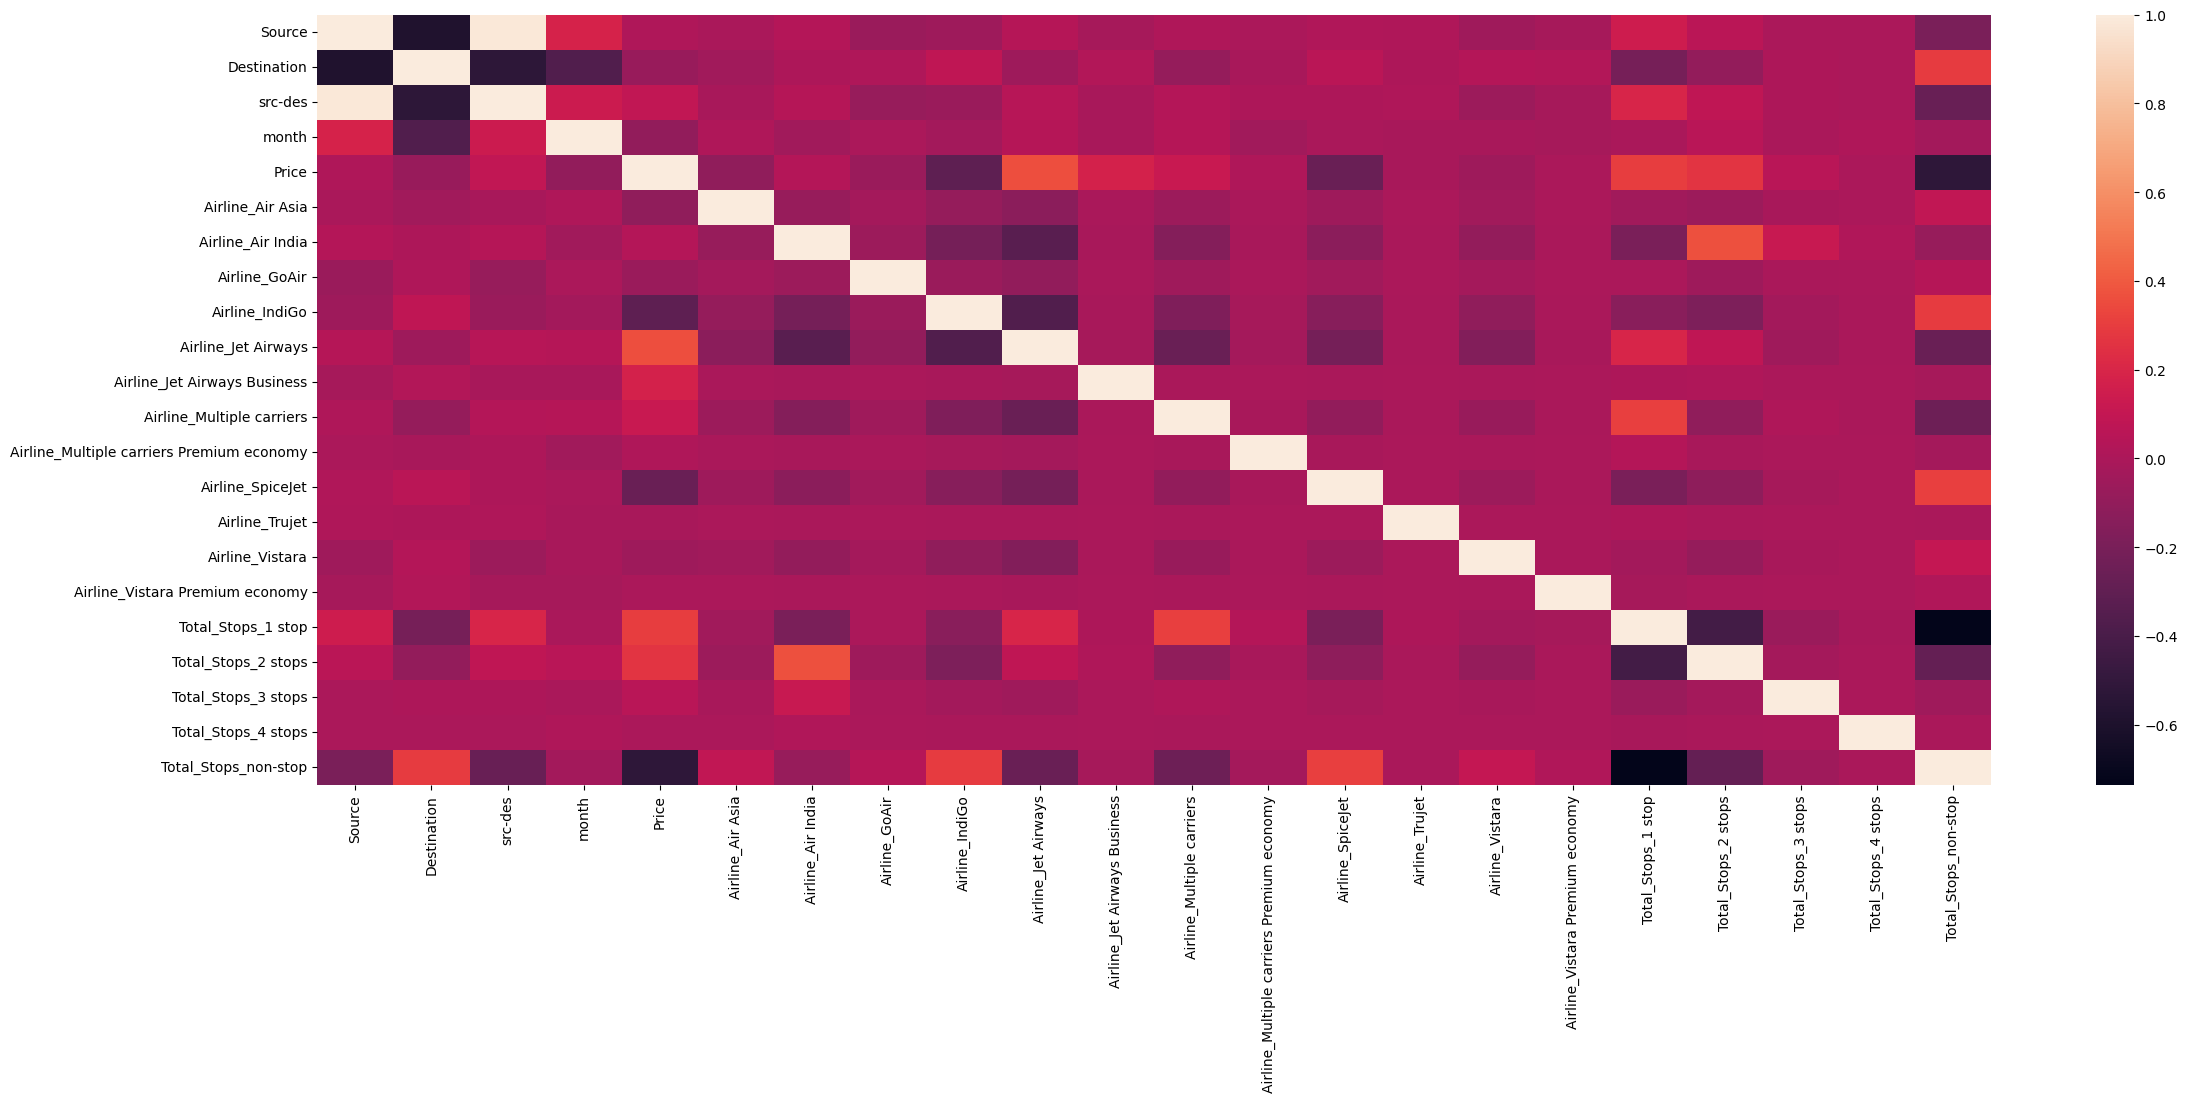

In [ ]:
corr=df_new.corr(method='pearson')
# plot the heatmap to observe correlation between the features
plt.subplots(1,1,figsize=(27,10))

plt.subplot(111)
sns.heatmap(corr)

# Final Observations:
- In month 3, there has been a very high flight prices compared to other months
- as the days increases i.e from the beginning of month to the end, the flight prices keep falling
-
- 
- The Flight prices of the following routes(source-destnation) is higher than other routes:
  1. Bangalore-New delhi
  2. Kolkata-Bangalore
  3. Delhi-Cochin
  - These high prices can be attributed to their long distances.


# answer 8
From the graphs, correlation table and observetions in previous answer, we can make inferences for the factors affecting the flight prices in the dataset:- 

In [ ]:
# corr

In [ ]:
df_new.describe()

,Source,Destination,src-des,month,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
count,10683.000000,10683.000000,10683.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,1.952541,1.436581,2.834129,4.708575,9087.214567,0.029863,0.163921,0.018161,0.192192,0.360326,...,0.001217,0.076577,0.000094,0.044842,0.000281,0.526587,0.142295,0.004213,0.000094,0.326811
std,1.177591,1.475437,1.397703,1.164408,4611.548810,0.170218,0.370221,0.133541,0.394042,0.480117,...,0.034866,0.265932,0.009676,0.206966,0.016757,0.499316,0.349369,0.064771,0.009676,0.469070
min,0.000000,0.000000,0.000000,3.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000,5277.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,3.000000,5.000000,8372.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,4.000000,6.000000,12373.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,6.000000,6.000000,6.000000,79512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the previous answer, we have the visualizations and heatmap to identify the factors that affect flight prices:
- Statistics 
    
      maximum, minimum, standard deviation, mean, etc,
- Heatmap: 

      correlation between different features and flight prices.


- Regression analysis:

model the relationship between flight prices and other features such as duration, total stops, and additional information. 

      (identify which features have a significant impact on flight prices.)

- Cluster analysis:

group flights based on their features and prices.

       (identify any patterns or trends in flight prices among different groups of flights.)

Form the inference/observations, heatmap and corr dataframe(correlation data) in the previous answer(answer 7) , we have the following factors that affect flight prices:

- month 5 and 6 have large number of flights taking off
- from the heatmap, we observe that the flight price is coorrelated to these features most significantly:
  1. non stop flight: -52.39%
  2. Airline Indigo: -31.15%
  3. Airline Spicejet: -26%
  4. Airline Asia : -10.52%
  5. month: -10.36%
  6. Airline Multiple Carriers: 11.95%
  7. Jet Airways Business: 17.61%
  8. 2 stops: 26.225
  9. 1 stop: 29.855
  10. Airline Jet Airways: 36.37%
- as the number of non stop flights decrases the flight prices increases  
- The mean price is \$9087.21, minimum price is \$1759 and maximum price is \$79512.




# answer 9

In [ ]:
import urllib.request

# URL of the CSV file to download
url = "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"

# Path where the CSV file should be saved locally
file_path = "googleplaystore.csv"

# Download the CSV file from the URL and save it locally
urllib.request.urlretrieve(url, file_path)

('googleplaystore.csv', <http.client.HTTPMessage at 0x7fdde400ef10>)

In [ ]:
df2=pd.read_csv('googleplaystore.csv')

In [ ]:
df2.shape

(10841, 13)

In [ ]:
# df2[df2.duplicated('App')].shape
# df2=df2.drop_duplicates(subset=['App'],keep='first')
df2.drop_duplicates(inplace=True)
df2.shape

(10358, 13)

It has 10841 rows and 13 columns 
Without dupliates it has 10358 rows and 13 columns.

# answer 10

In [ ]:
df2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<Axes: xlabel='Category', ylabel='Rating'>

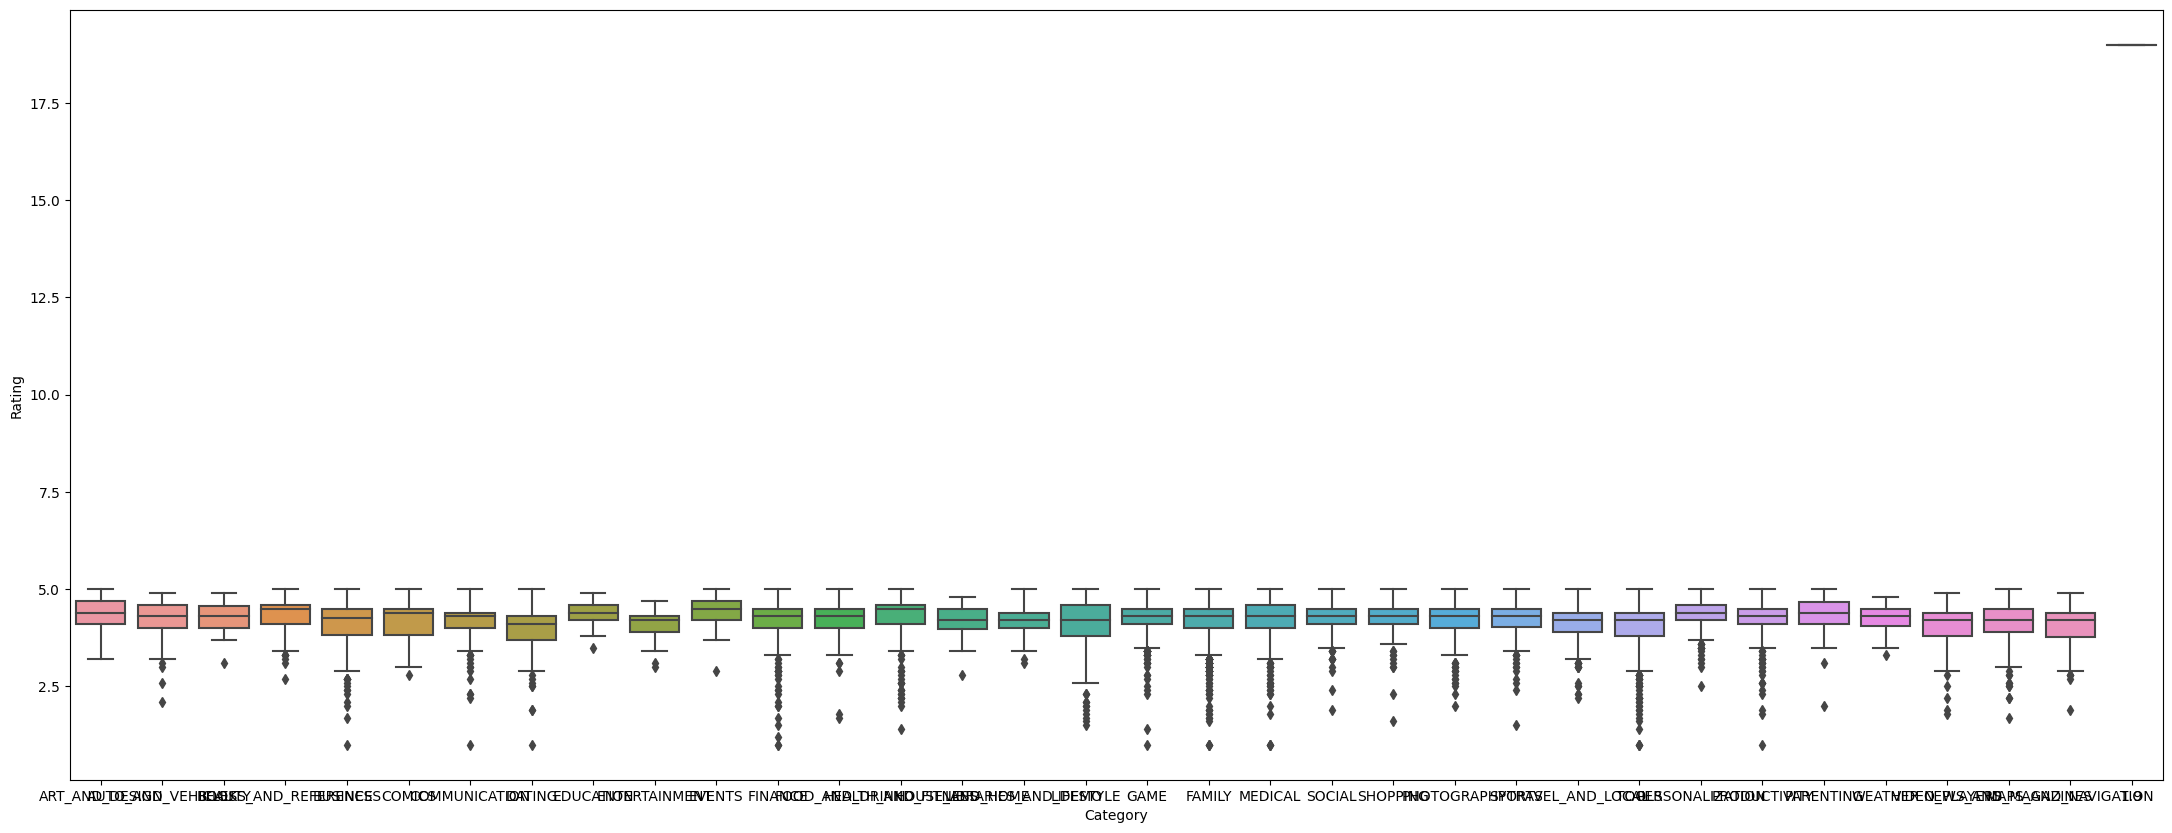

In [ ]:
plt.subplots(1,1,figsize=(27,10))

plt.subplot(111)
sns.boxplot(df2,x='Category',y='Rating')

In [ ]:
# px.box(df2,x='Category',y="Rating")

# answer 11
- There are 1474 missing ratings and a few missing values in type, content rating, current ver, android ver

- The missing values impact our data analysis in the following ways:

   - Reducing the Sample Size:  it makes it difficult to draw any meaningful conclusions or perform accurate statistical analyses.

   - Biased Results: It introduce bias into the data analysis.

   - Incomplete Conclusions: We cannot draw complete conclusions. For instance, if a variable has many missing values, it may be challenging to determine its relationship with other variables in the dataset.

   - Incorrect Statistical Models:It leads to incorrect statistical models. 
   
       - If the missing values are not handled correctly, the model may overestimate or underestimate the effect of the variable on the outcome. 

In [ ]:
df2.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#  the data has a large number of outlirs corresponding to different categories
#  group by category and fill in the missing values by the median  : median imputation
df2['Rating'].median()

4.3

In [ ]:
# Group the data by category and get the mean rating for each category
category_mean = df2.groupby('Category')['Rating'].mean()

# Fill the missing values in the ratings column with the mean rating of their respective category
df2['Rating'] = df2.groupby('Category')['Rating'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# drop the other missing values as they are very few in comparison to the original dataset
df2.dropna(inplace=True)
df2.isnull().sum()
# df2.shape

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# answer 12

In [ ]:
df2=pd.read_csv('googleplaystore.csv')
# df2.drop_duplicates(inplace=True)

In [ ]:
# df2.info()
# df2.head(2)
# df2['Size'].unique()
# we have size in Mb and kb so we transform to numrical data for analysis according to 1Mb=1024kb
x=0

for i in df2['Size']:
  if i.find('M')!=-1:
    i=i.replace('M',"")
    df2.loc[x,'Size']=float(i)*1024
  elif i.find('k')!=-1:
    i=i.replace("k","")
    df2.loc[x,'Size']=float(i)
  else:
    df2.loc[x,'Size']=None
  x+=1

In [ ]:
df2['Size'].fillna(method='ffill',inplace=True)

# Group the data by category and get the mean rating for each category
category_mean = df2.groupby('Category')['Rating'].mean()
# Fill the missing values in the ratings column with the mean rating of their respective category
df2['Rating'] = df2.groupby('Category')['Rating'].apply(lambda x: x.fillna(x.mean()))
# drop the other missing values as they are very few in comparison to the original dataset
df2.dropna(inplace=True)
# df2.isnull().sum()

Text(0.5, 0, 'The size is in kb')

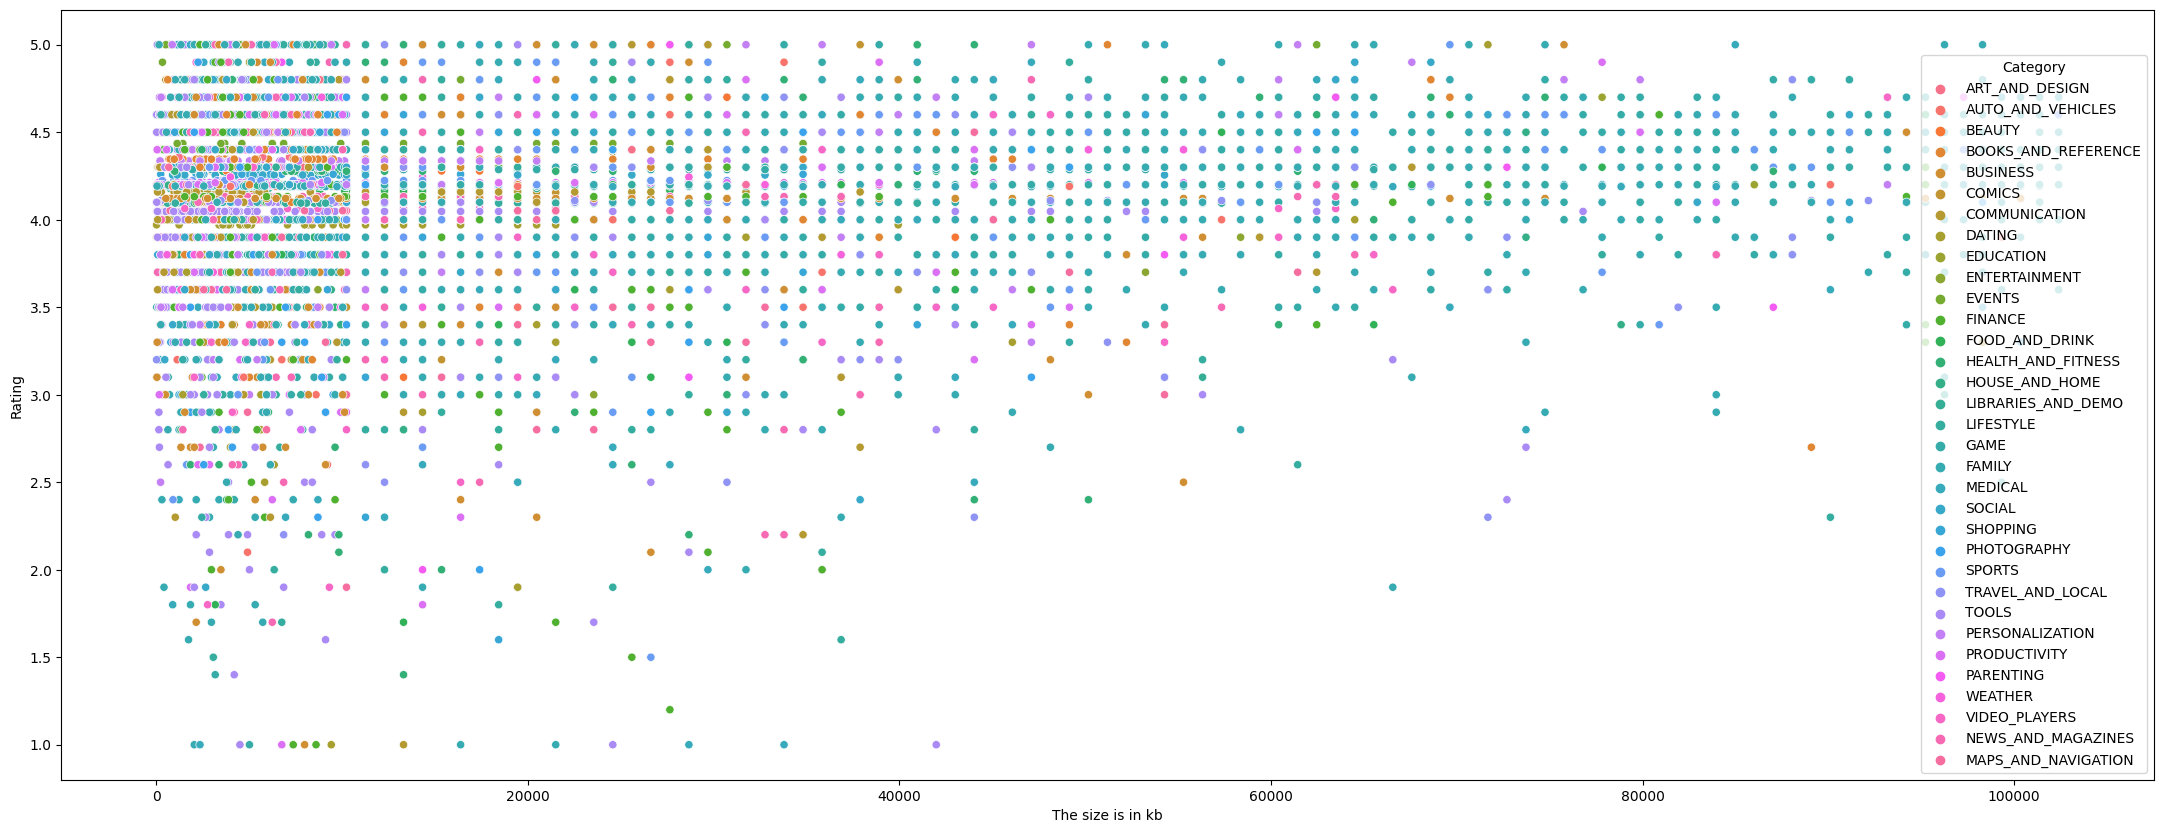

In [ ]:
plt.subplots(1,1,figsize=(27,10))

plt.subplot(111)
sns.scatterplot(df2,x='Size',y='Rating',hue='Category')
plt.xlabel('The size is in kb')

# Observations:
- There is a very large number of apps with small sizes
- the small size apps have higher number of good(maximum ratings).
- A very large number of small size apps between 0 to 10000kb have ratings between 4 and 4.5
- The family and games category has the highest number of apps and so has the highest number of ratings(data points)

# answer 13

In [ ]:
# df2.info()
# df2.head(2)
# df2['Price'].unique()
df2['Price'] = df2['Price'].str.replace("$","").astype('float')

Text(0, 0.5, 'In Dollars')

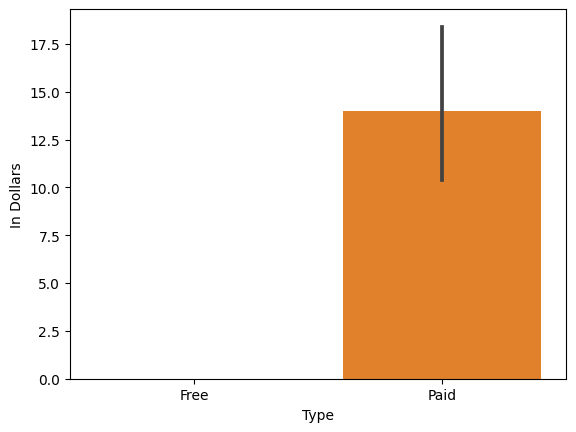

In [ ]:
ax=sns.barplot(df2,x='Type',y='Price')
ax.set_ylabel('In Dollars')

# answer 14

In [ ]:
chars=['+',',','$']
for x in chars:
  df2['Installs']=df2['Installs'].str.replace(x,'')

df2['Installs'] = df2['Installs'].astype('int')

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

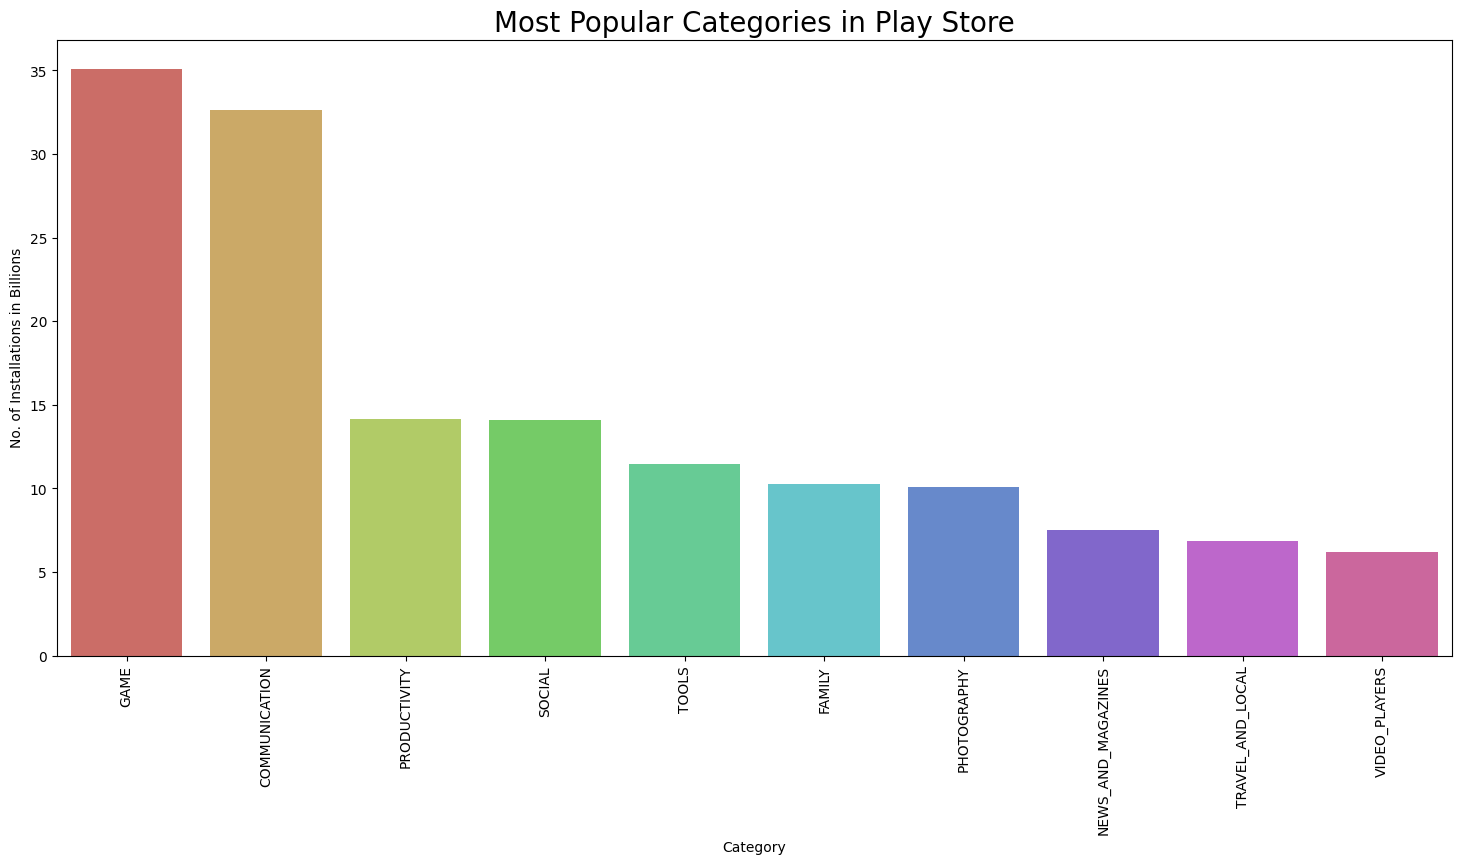

In [ ]:
df_cat_installs = df2.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df3 = df_cat_installs.head(10)


plt.figure(figsize = (18,8))
ax = sns.barplot(x = 'Category' , y = 'Installs' , data = df3,palette='hls' )
plt.xticks(rotation=90)
ax.set_ylabel('No. of Installations in Billions')
# ax.set_xlabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [ ]:
# frequency table: Installs in billions
print(df3.loc[:10,['Category','Installs']])

             Category   Installs
0                GAME  35.086024
1       COMMUNICATION  32.647276
2        PRODUCTIVITY  14.176091
3              SOCIAL  14.069868
4               TOOLS  11.452272
5              FAMILY  10.258203
6         PHOTOGRAPHY  10.088248
7  NEWS_AND_MAGAZINES   7.496318
8    TRAVEL_AND_LOCAL   6.868887
9       VIDEO_PLAYERS   6.222003


# answer 15
From the bar chart in the previous answer, we have some obervations like the number ofinstallations is amximum for games and communication apps.

1. So, it would be beneficial to invst in some gaming or communication category apps.


---



Also from the scatter plot in answer 12, we observe
- There is a very large number of apps with small sizes
- the small size apps have higher number of good(maximum ratings).
- A very large number of small size apps between 0 to 10000kb have ratings between 4 and 4.5
- The family and games category has the highest number of apps and so has the highest number of ratings(data points)

2. So, we can say that new app should have less size to perform better.


---


However, before having a final inference , we would analyse some more graphs like:
   - Highest number of type of apps(paid or free) present on the playstore
   - Highest number of category of apps present on the playstore
   - type of apps vs categories (which category of apps have high number of paid/free apps)
   - also we can find trends between 
      sizes and prices 
      installs vs sizes/price
      price/type vs reviews

3. Hence.


---



# answer 16
From the graphs and observations in previous answer (answer 15), we infer that the most succesfull app developers are most probably the games and communications app developers. Also the developers who make small size apps perform better.

# answer 17
The given data set does not contain any launch data feature, but we can use the Last Updated feature to finnd the best time to launch a new app.




In [ ]:
df2.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
df2.loc[0:1,'Last Updated'].str.split(" ")

0     [January, 7,, 2018]
1    [January, 15,, 2018]
Name: Last Updated, dtype: object

In [ ]:
df2.loc[0:1,'Last Updated'].str.split(" ")[0][0]

'January'

In [ ]:
def mtn(x):
    months = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    a = x.strip()[:3].lower()
    try:
        ez = months[a]
        # print (ez)
        return ez
    except:
        # raise ValueError('Not a month')
        return 0

In [ ]:
df2['Last Updated']=df2['Last Updated'].str.replace(',',"")

tmp_df=pd.DataFrame()

tmp_df['Month']=df2['Last Updated'].str.split(" ")
tmp_df['m']=tmp_df['Month'].loc[:].str[0]
tmp_df['m']
tmp_df['d']=tmp_df['Month'].loc[:].str[1]
tmp_df['d']=tmp_df['d'].astype(int)
tmp_df['y']=tmp_df['Month'].loc[:].str[2]
tmp_df.head(2)

,Month,m,d,y
0,"[January, 7, 2018]",January,7,2018
1,"[January, 15, 2018]",January,15,2018


In [ ]:
tmp_df['m'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February'], dtype=object)

In [ ]:
# month to corresponding int month
tmp_df['m']=tmp_df['m'].apply(mtn)

In [ ]:
tmp_df['y']=tmp_df['y'].astype(int)

In [ ]:
# appending the temporary df to original df having only required features
df2=pd.concat([df2,tmp_df],axis=1)

In [ ]:
df2.drop(['Month','Current Ver'],axis=1,inplace=True)
df2.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,m,d,y
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,January 7 2018,4.0.3 and up,1,7,2018


Text(0.5, 0, 'Month')

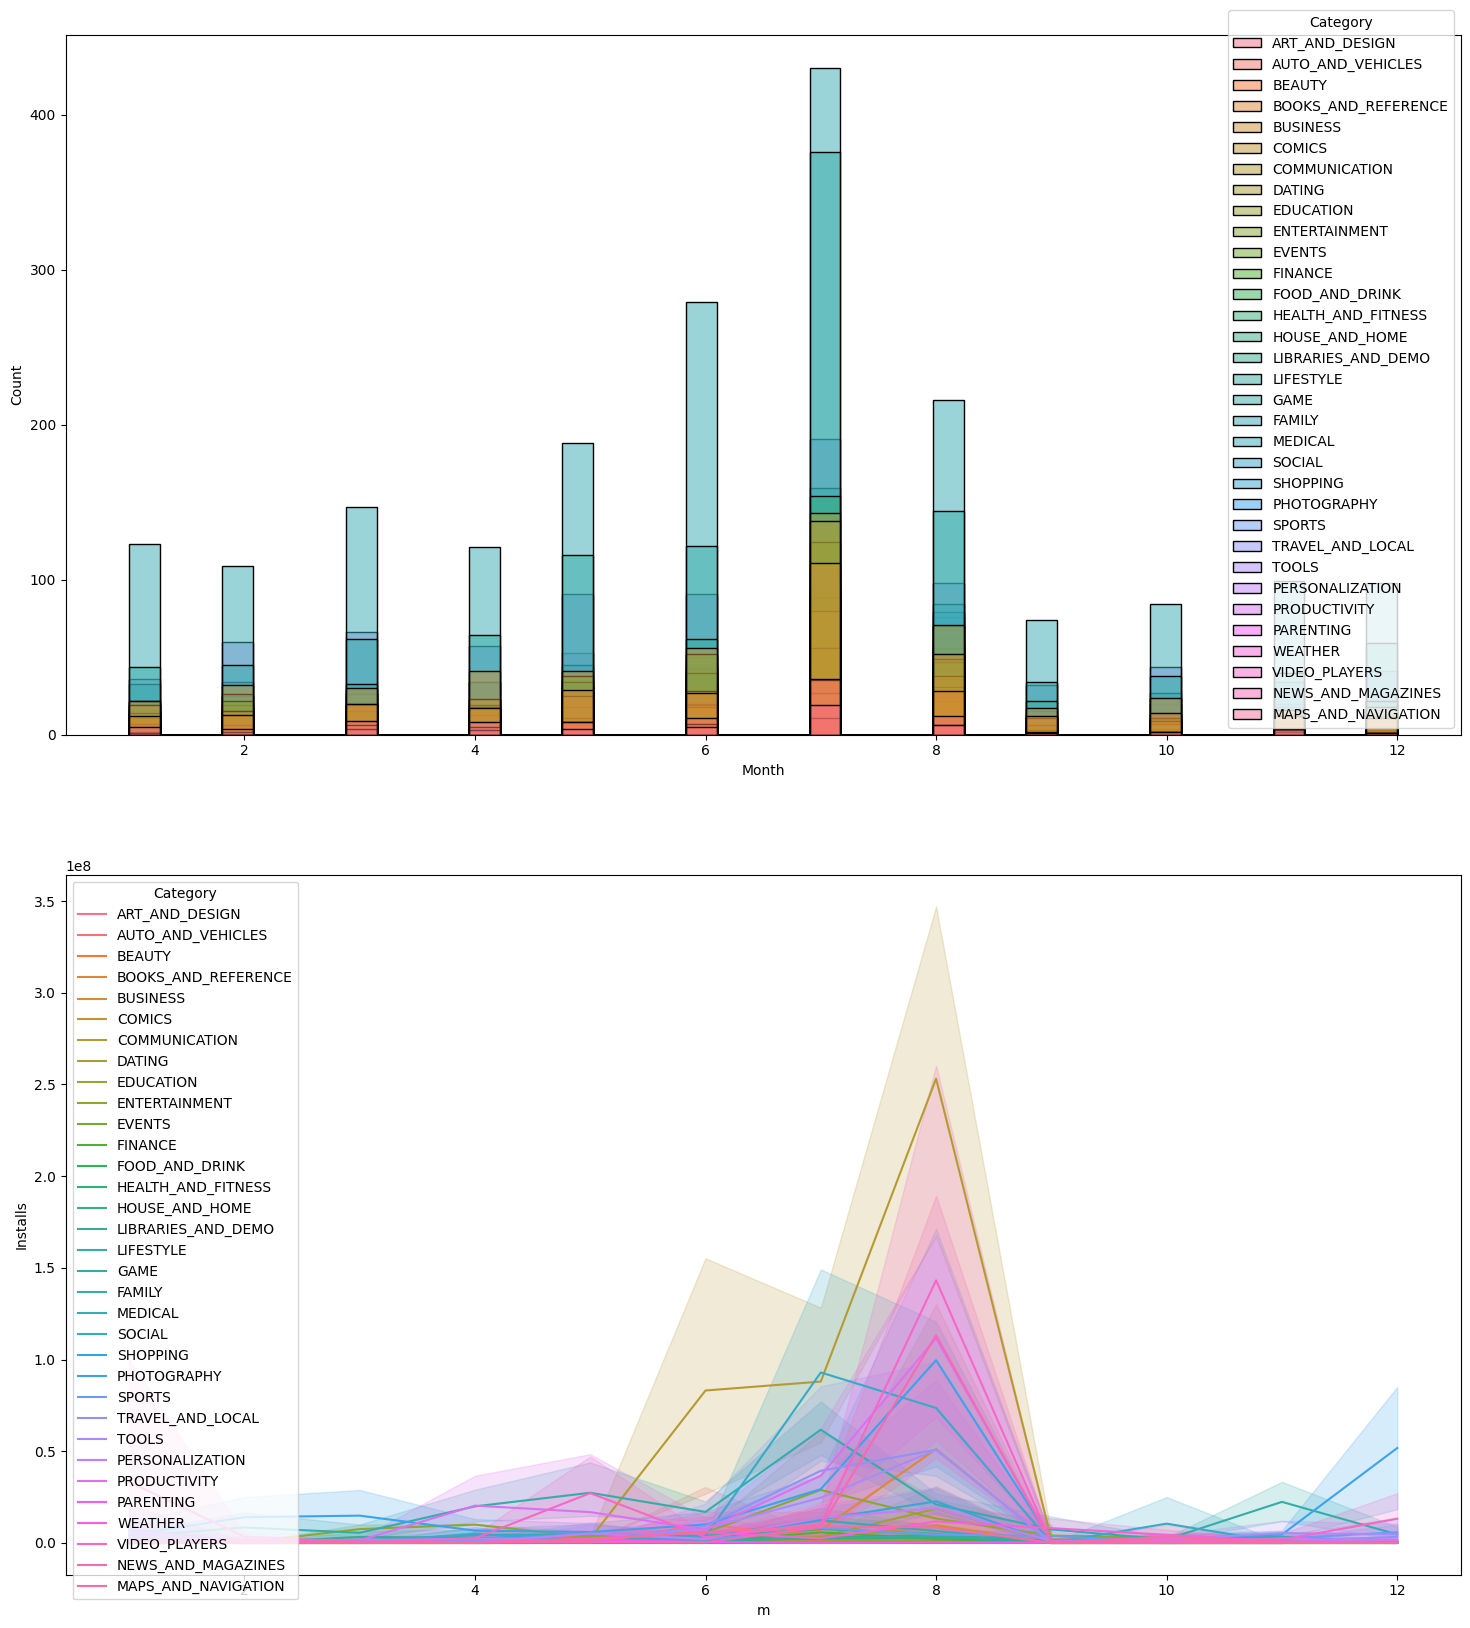

In [ ]:
plt.subplots(2,1,figsize=(18,20))

# most apps updated in which month and what category apps were most updated
plt.subplot(211)
ax=sns.histplot(df2,x='m',hue='Category')
ax.set_xlabel('Month')

# most installed apps in which month and what category
plt.subplot(212)
sns.lineplot(df2,x='m',y='Installs',hue='Category')
ax.set_xlabel('Month')

Text(0.5, 0, 'Year')

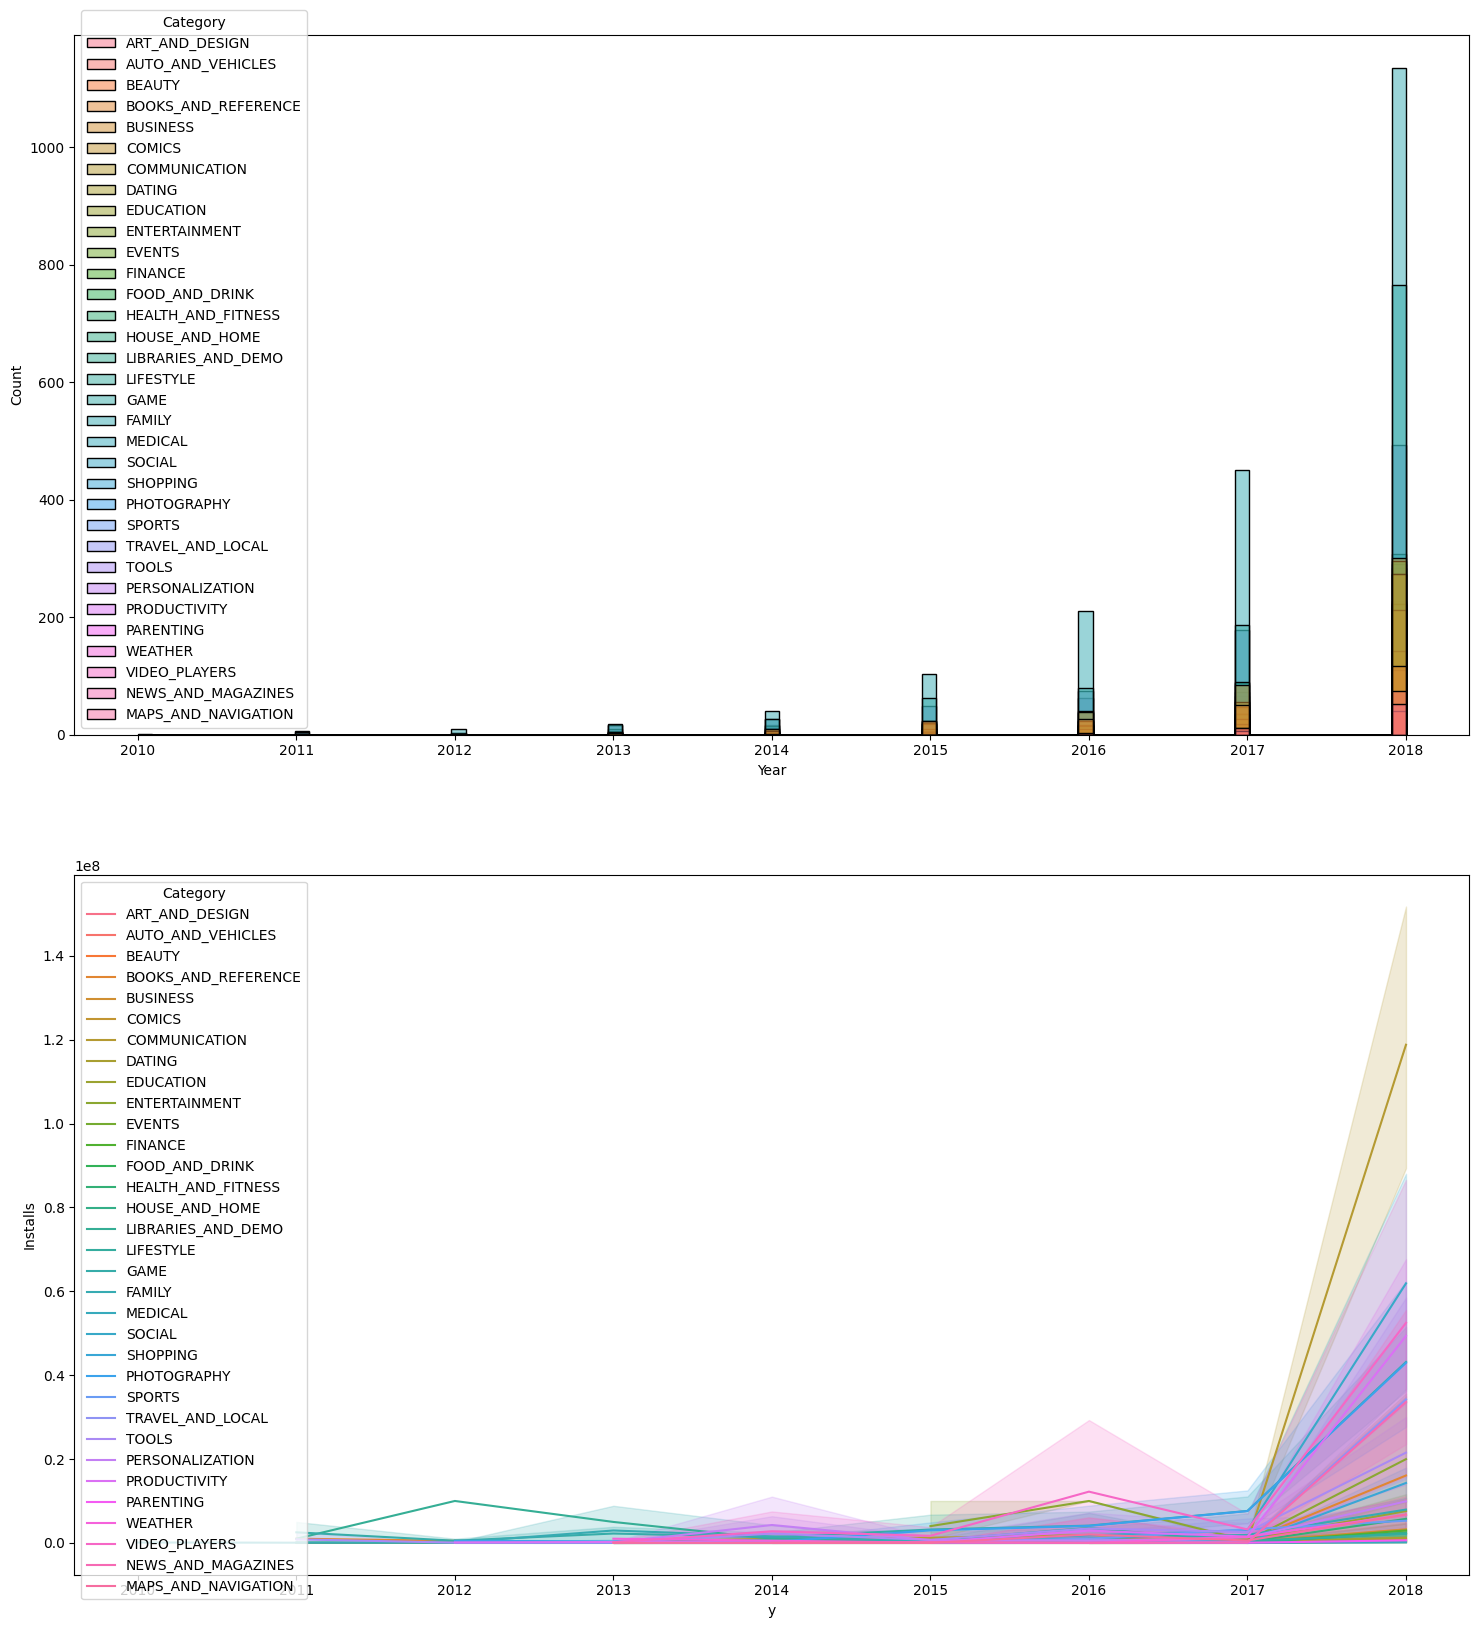

In [ ]:
plt.subplots(2,1,figsize=(18,20))

# most apps updated in which year and what category apps were most updated
plt.subplot(211)
ax=sns.histplot(df2,x='y',hue='Category')
ax.set_xlabel('Year')

# most installed apps in which year and what category
plt.subplot(212)
sns.lineplot(df2,x='y',y='Installs',hue='Category')
ax.set_xlabel('Year')

Text(0.5, 0, 'Day')

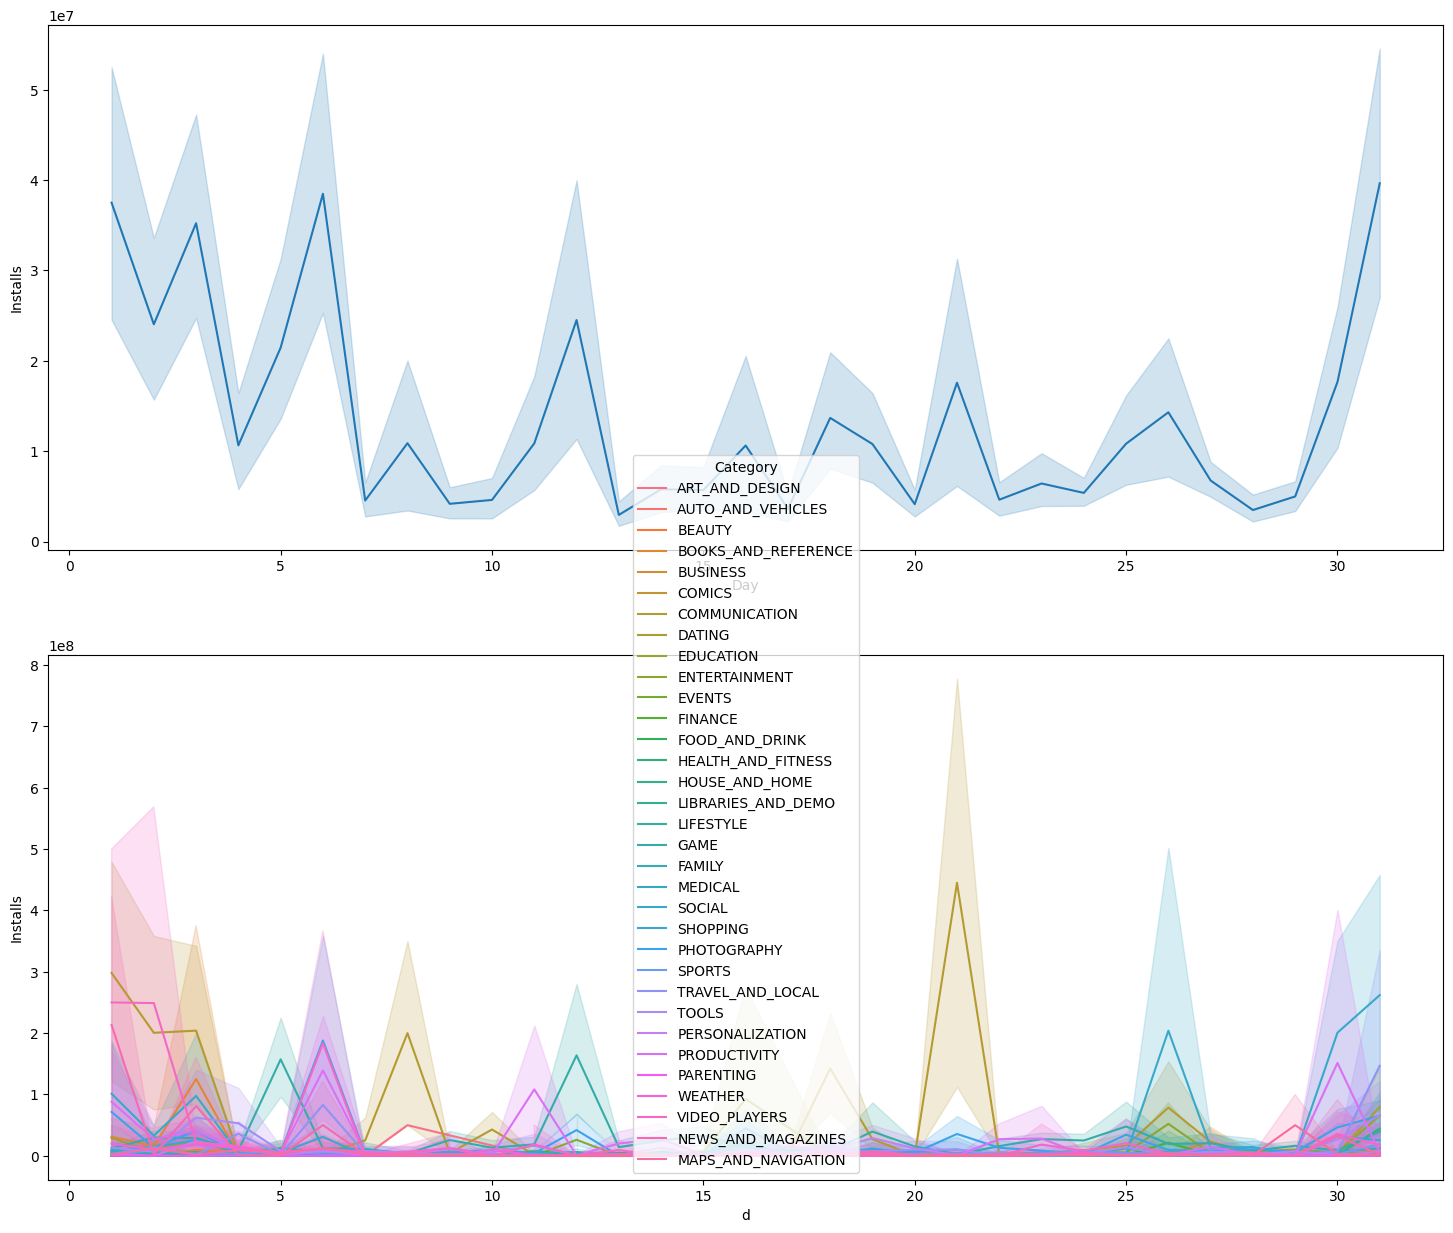

In [ ]:
plt.subplots(2,1,figsize=(18,15))

# most apps updated in which day and what category apps were most updated
plt.subplot(211)
ax=sns.lineplot(df2,x='d',y='Installs')
ax.set_xlabel('Day')

# most installed apps in which day and what category
plt.subplot(212)
sns.lineplot(df2,x='d',y='Installs',hue='Category')
ax.set_xlabel('Day')

The following inferences are made based on the graphs above:
1. Month 7 (July month) has the highest number of counts.(Game, communications, social/medical/lifestyle were the most updated apps.)
2. July month has the highest number of installs also.(Communications apps were the most installed)
- So, we can launch an app in July month basically of communications and game category.
3. There has been a steep rise in the number of updated apps from year 2017 to 2018.
4. Communication, tools , personalisation, shopping and photography apps saw a steep rise in installs/updates.
- So, we can launch communications apps
5. From the line graph of days, we see that most number of apps are updated and installed in the beginning and end of month.
6. Communications app was the most updated and installed.

# The final conclusion is we can launch apps related to communications category in the month of july. Also, to have more installs and reach, we can launch in the beginning of the month or the ending of the month. 